### **Context:**
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.  

### **Data Description:**
- **Age**: The age of the individual in years.
- **Gender**: The gender of the individual, categorized as male or female.
- **Profession**: The occupation or profession of the individual.
- **Marital_status**: The marital status of the individual, such as married &, single
- **Education**: The educational qualification of the individual Graduate and Post Graduate
- **No_of_Dependents**: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
- **Personal_loan**: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
- **House_loan**: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
- **Partner_working**: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
- **Salary**: The individual's salary or income.
- **Partner_salary**: The salary or income of the individual's partner, if applicable.
- **Total_salary**: The total combined salary of the individual and their partner (if applicable).
- **Price**: The price of a product or service.
- **Make**: The type of automobile

# 1 Sanity Checks

## 1.1 Importing necessary libraries and the dataset

In [267]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [268]:
data = pd.read_csv("D:/Data Science/Module-1/project/austo_automobile+29+29.csv")

In [269]:
data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback


In [270]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [271]:
data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


## 1.2 Statistical Summary


In [274]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


**Checking for duplicate entries in the data**

In [276]:
data.duplicated().sum()

0

In [277]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


## 1.3 **Missing value treatment**

In [279]:
data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

### Treating 'Gender' column

In [281]:
data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

 **Replacing the typo error**

In [283]:
data['Gender']=data['Gender'].replace(['Femal','Femle'],'Female')

In [284]:
data['Gender'].value_counts(normalize=True,dropna=False)

Gender
Male      0.758381
Female    0.208096
NaN       0.033523
Name: proportion, dtype: float64

In [285]:
data['Gender'].apply(type).value_counts()

Gender
<class 'str'>      1528
<class 'float'>      53
Name: count, dtype: int64

In [286]:
data = data.assign(Gender=data['Gender'].fillna('Male'))#Mode of the data 

In [287]:
data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [288]:
arr = list(data.columns)
print(arr)

['Age', 'Gender', 'Profession', 'Marital_status', 'Education', 'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working', 'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make']


### Treating 'Partner_salary' column

In [290]:
data.loc[data['Partner_salary'].isnull()==True,'Partner_salary']

40     NaN
43     NaN
49     NaN
59     NaN
111    NaN
        ..
1559   NaN
1567   NaN
1568   NaN
1577   NaN
1579   NaN
Name: Partner_salary, Length: 106, dtype: float64

In [291]:
data['Partner_salary'] = data['Partner_salary'].fillna(value= data['Partner_salary'].median())

*Even if data has no extreme outliers are present in the 'Partner_salary' column we prefer median rather than mean to replace NaN values as the data is not gaussian.*

In [293]:
data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

**Count of unique categorical levels in each column**

In [295]:
cat_vars = ['Gender','Profession','Marital_status','Education','Personal_loan', 'House_loan', 'Partner_working','Make']
for col in cat_vars:
    print(data[col].value_counts())
    print('__'*40)

Gender
Male      1252
Female     329
Name: count, dtype: int64
________________________________________________________________________________
Profession
Salaried    896
Business    685
Name: count, dtype: int64
________________________________________________________________________________
Marital_status
Married    1443
Single      138
Name: count, dtype: int64
________________________________________________________________________________
Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64
________________________________________________________________________________
Personal_loan
Yes    792
No     789
Name: count, dtype: int64
________________________________________________________________________________
House_loan
No     1054
Yes     527
Name: count, dtype: int64
________________________________________________________________________________
Partner_working
Yes    868
No     713
Name: count, dtype: int64
____________________________________________

# 2 **Exploratory Data Analysis**

### 2.1 **Univariate Analysis**

**Let's check the distribution for numerical columns.**

#### • Age

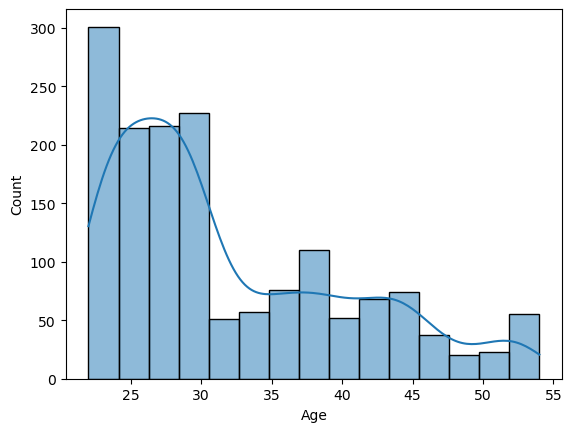

In [300]:
sns.histplot(data,x='Age',kde=True)
plt.savefig('Downloads/1.png')

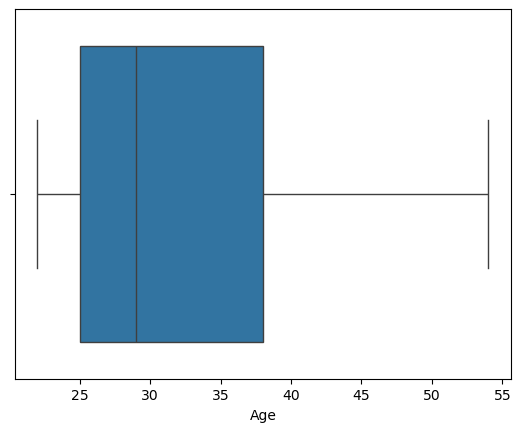

In [301]:
sns.boxplot(data=data,x='Age')
plt.savefig('Downloads/2.png')

#### • No_of_Dependents

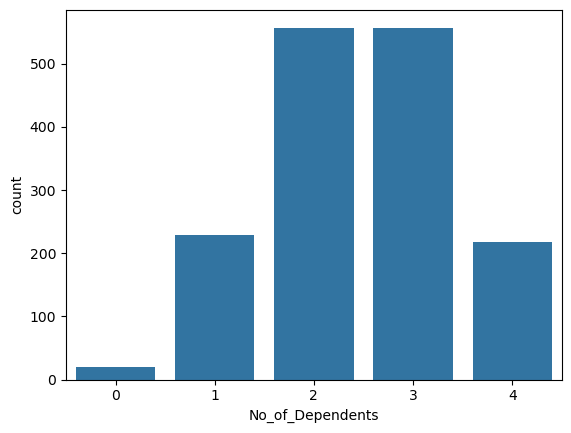

In [303]:
sns.countplot(data,x='No_of_Dependents')
plt.savefig('Downloads/3.png')

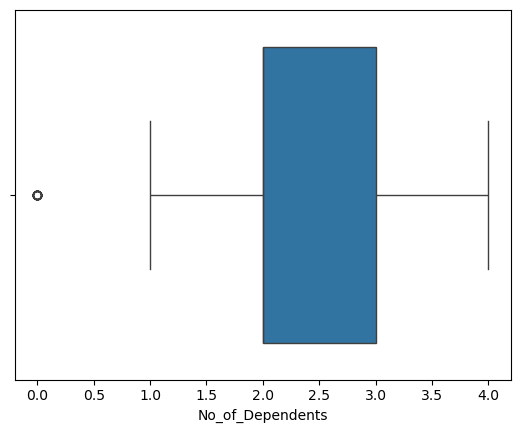

In [304]:
sns.boxplot(data=data,x='No_of_Dependents')

plt.savefig('Downloads/4.png')

In [305]:
data['No_of_Dependents'].value_counts(normalize=True)

No_of_Dependents
3    0.352309
2    0.352309
1    0.144845
4    0.137887
0    0.012650
Name: proportion, dtype: float64

#### • Salary

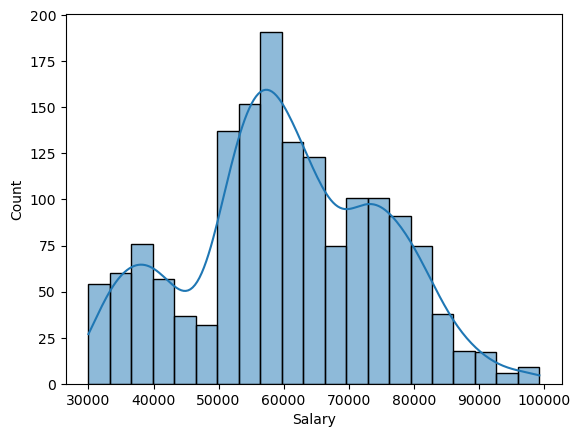

In [307]:
sns.histplot(data,x='Salary',kde=True)
# plt.show()
plt.savefig('Downloads/5.png')


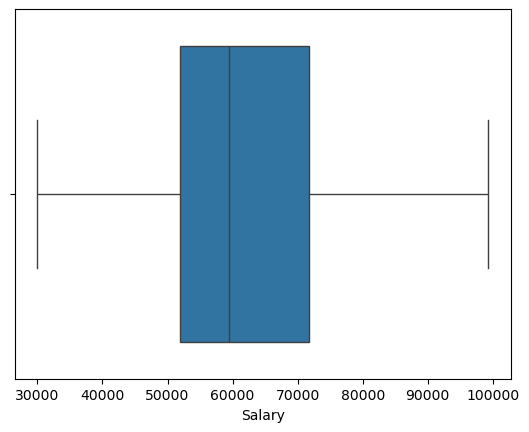

In [308]:
sns.boxplot(data=data,x='Salary')
# plt.show()
plt.savefig('Downloads/6.png')

#### • Partner_salary

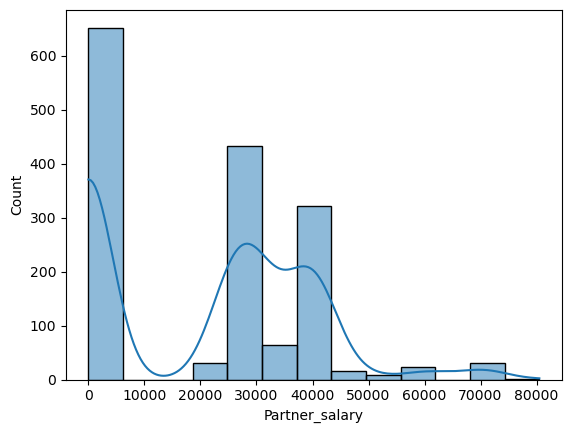

In [310]:
sns.histplot(data,x='Partner_salary',kde=True)

plt.savefig('Downloads/7.png')


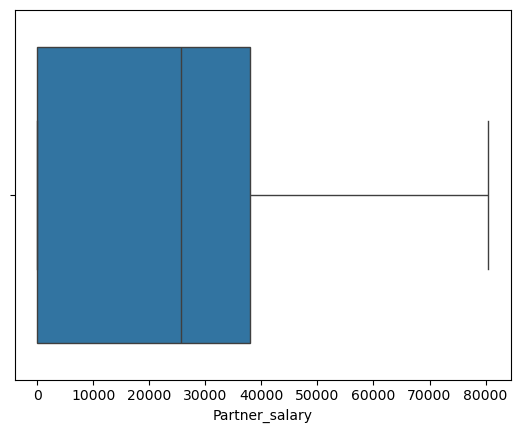

In [311]:
sns.boxplot(data=data,x='Partner_salary')

plt.savefig('Downloads/8.png')

#### • Total_salary

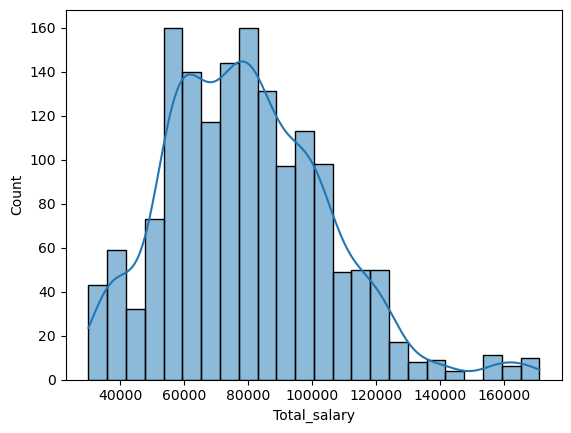

In [313]:
sns.histplot(data,x='Total_salary',kde=True)
plt.savefig('Downloads/9.png')


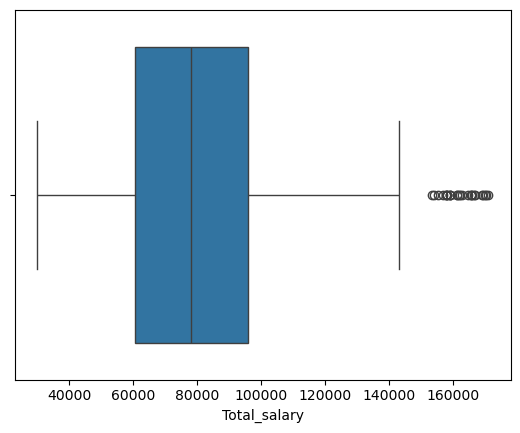

In [314]:
sns.boxplot(data=data,x='Total_salary')
plt.savefig('Downloads/10.png')

**Treating outliers in Total_salary column**

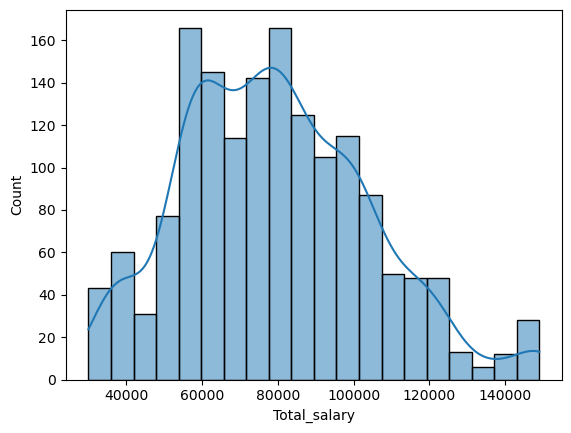

In [316]:
def treat_outliers(df, col):
    """
    treats outliers in a variable
    col: str, name of the numerical variable
    df: dataframe
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1                # Inter Quantile Range (75th perentile - 25th percentile)
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # all the values smaller than lower_whisker will be assigned the value of lower_whisker
    # all the values greater than upper_whisker will be assigned the value of upper_whisker
    # the assignment will be done by using the clip function of NumPy
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)

    return df

data = treat_outliers(data,'Total_salary')

# visualizing the column after outlier treatment
sns.histplot(data,x='Total_salary',kde=True)
plt.savefig('Downloads/11.png')


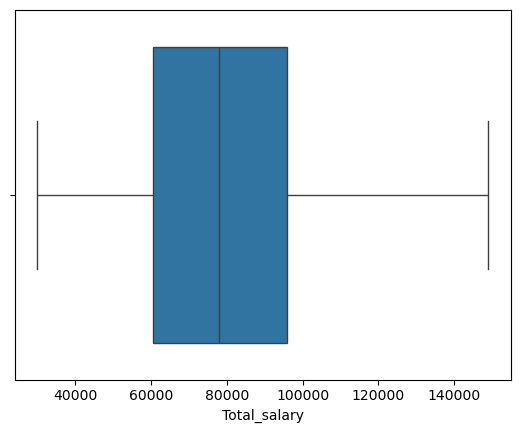

In [317]:
sns.boxplot(data=data,x='Total_salary')
plt.savefig('Downloads/12.png')

#### • Price

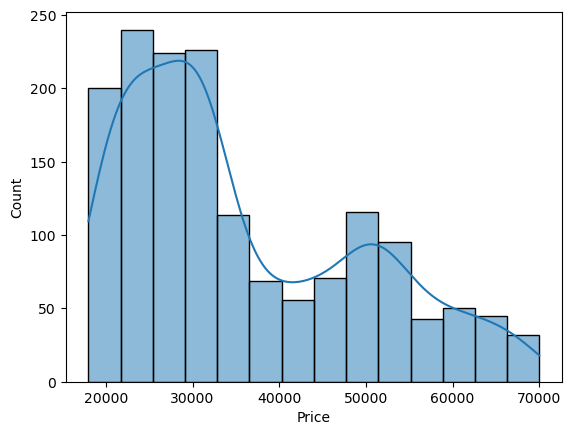

In [319]:
sns.histplot(data,x='Price',kde=True)
plt.savefig('Downloads/13.png')


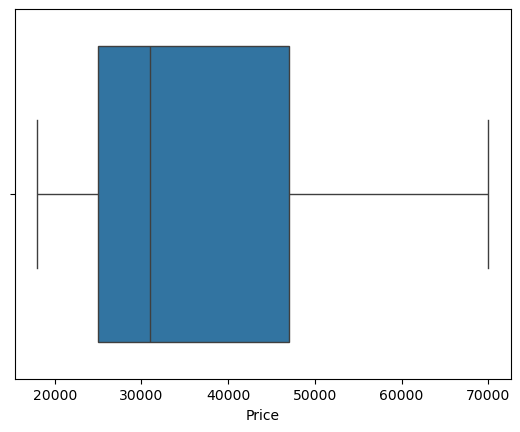

In [320]:
sns.boxplot(data=data,x='Price')
plt.savefig('Downloads/14.png')

 **Let's check the distribution for categorical columns.**

#### • Gender

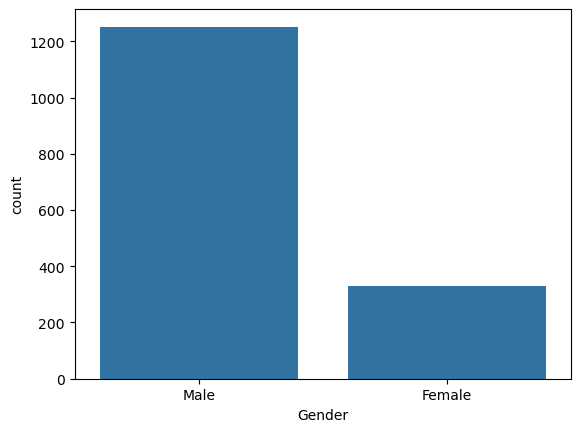

In [323]:
cat_vars = ['Gender','Profession','Marital_status','Education','Personal_loan', 'House_loan', 'Partner_working','Make']
sns.countplot(x='Gender',data=data);
plt.savefig('Downloads/15.png')

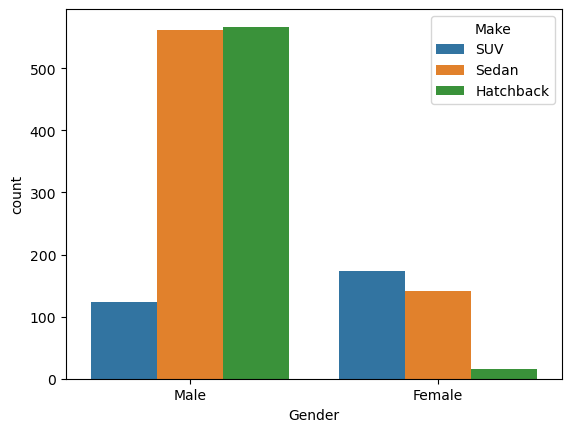

In [324]:
cat_vars = ['Gender','Profession','Marital_status','Education','Personal_loan', 'House_loan', 'Partner_working','Make']
sns.countplot(x='Gender',data=data,hue='Make');
plt.savefig('Downloads/15-1.png')

#### • Profession

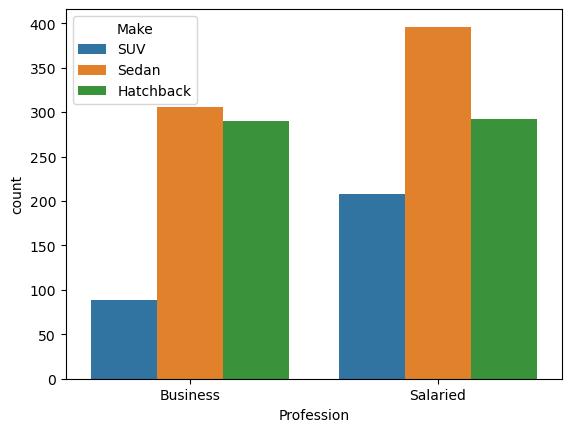

In [326]:
sns.countplot(x='Profession',data=data,hue='Make');
plt.savefig('Downloads/16-1.png')

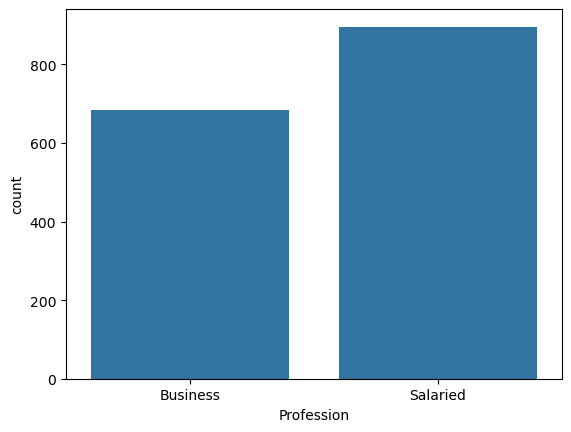

In [327]:
sns.countplot(x='Profession',data=data);
plt.savefig('Downloads/16.png')

#### • Marital_status

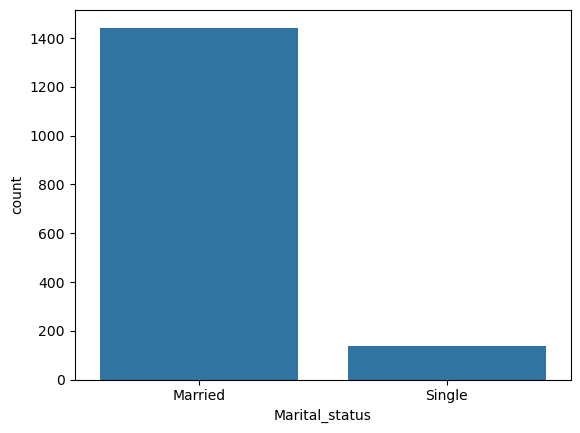

In [329]:
sns.countplot(x='Marital_status',data=data);
plt.savefig('Downloads/17.png')

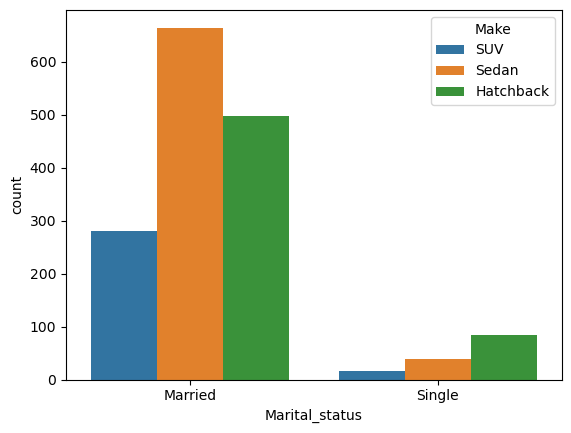

In [330]:
sns.countplot(x='Marital_status',data=data,hue='Make');
plt.savefig('Downloads/17-1.png')

#### • Education

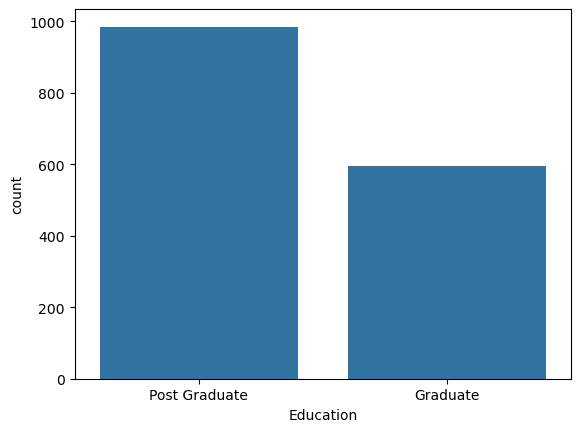

In [332]:
sns.countplot(x='Education',data=data);
plt.savefig('Downloads/18.png')

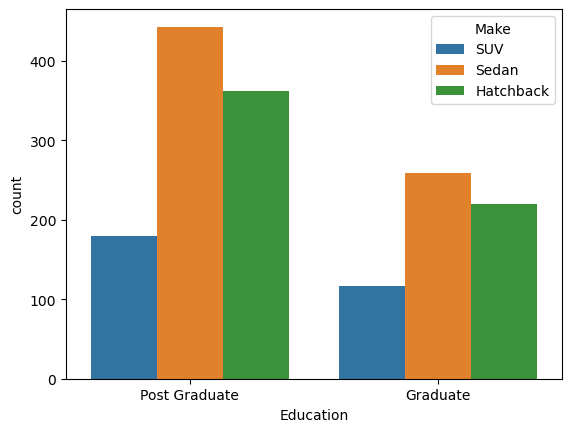

In [333]:
sns.countplot(x='Education',data=data,hue='Make');
plt.savefig('Downloads/18-1.png')

#### • Personal_loan

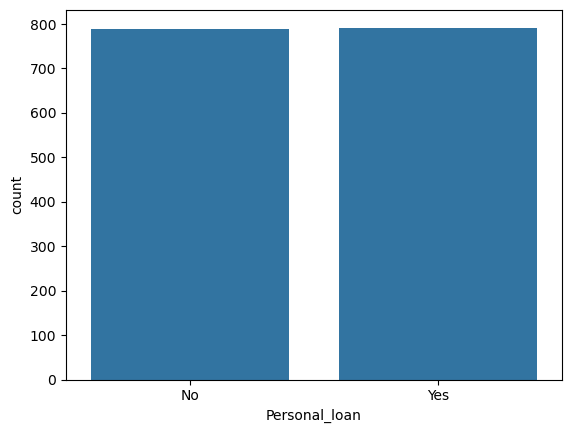

In [335]:
sns.countplot(x='Personal_loan',data=data);
plt.savefig('Downloads/19.png')

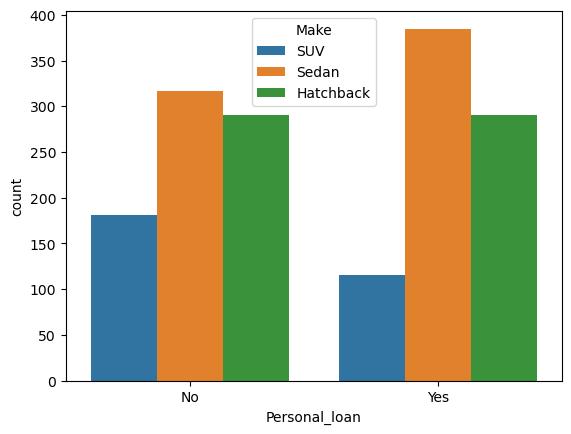

In [336]:
sns.countplot(x='Personal_loan',data=data,hue='Make');
plt.savefig('Downloads/19-1.png')

#### • House_loan

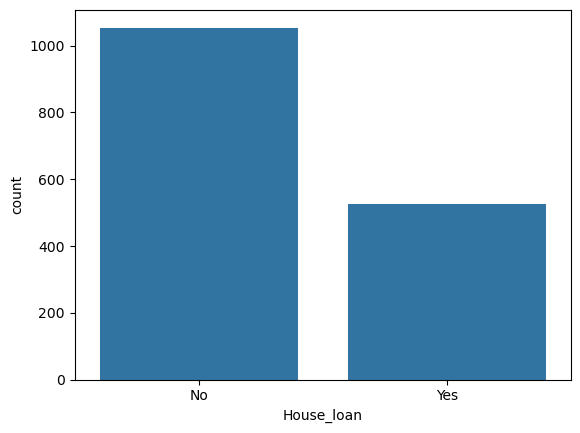

In [338]:
sns.countplot(x='House_loan',data=data);
plt.savefig('Downloads/20.png')

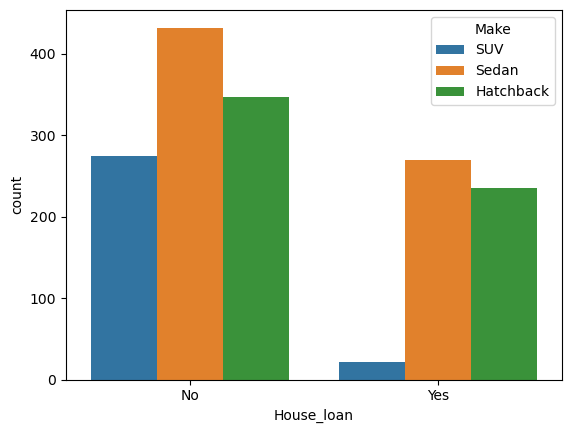

In [339]:
sns.countplot(x='House_loan',data=data,hue='Make');
plt.savefig('Downloads/20-1.png')

#### • Partner_working

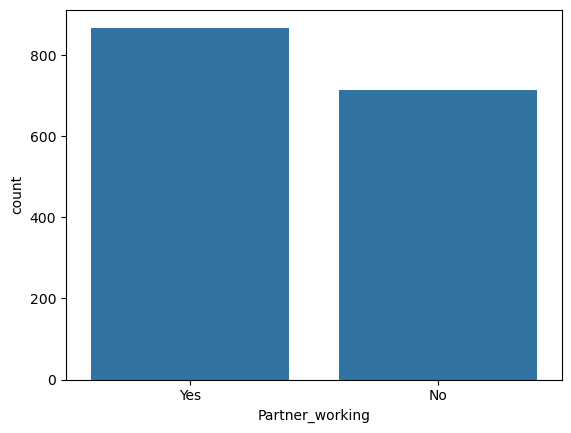

In [341]:
sns.countplot(x='Partner_working',data=data);
plt.savefig('Downloads/21.png')

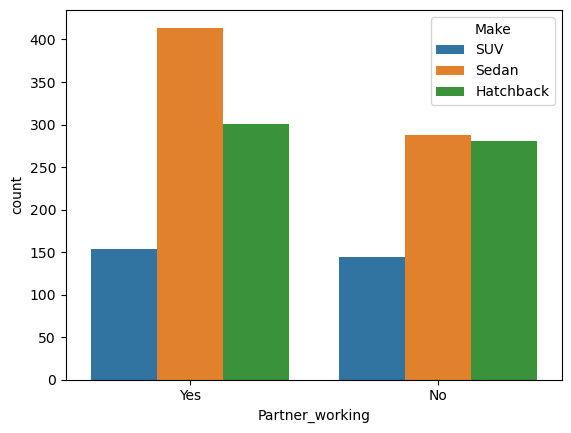

In [342]:
sns.countplot(x='Partner_working',data=data,hue='Make');
plt.savefig('Downloads/21-1.png')

#### • Make

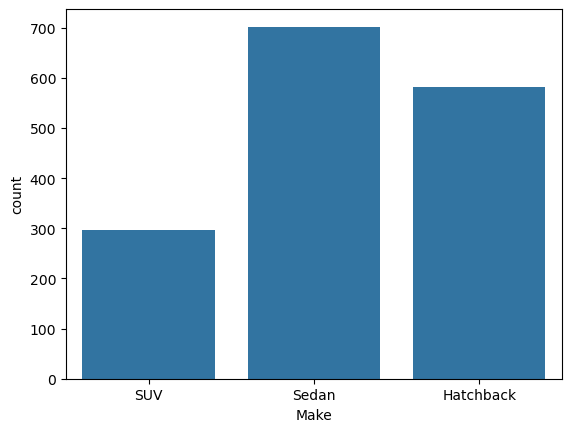

In [344]:
sns.countplot(x='Make',data=data);
plt.savefig('Downloads/22.png')

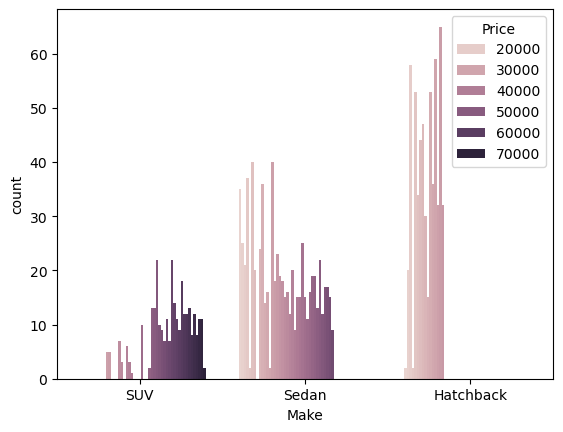

In [345]:
sns.countplot(x='Make',data=data,hue='Price');
plt.savefig('Downloads/22-1.png')

In [346]:
data.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

### 2.2 **Bivariate Analysis**

#### **Numerical variables**

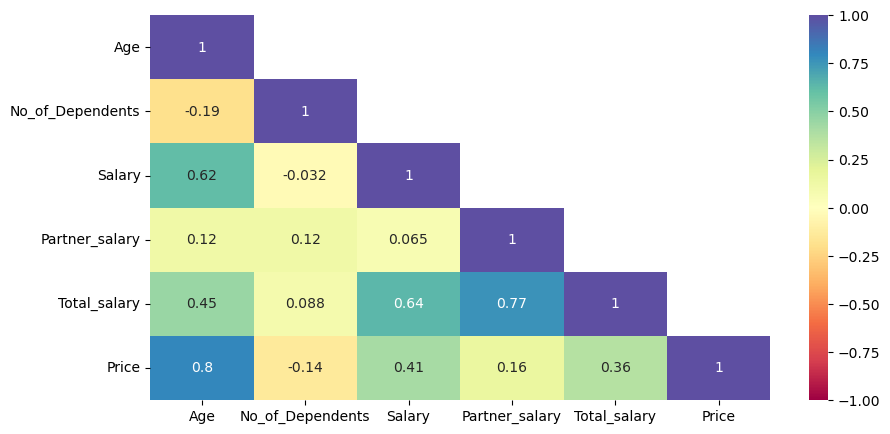

In [349]:
plt.figure(figsize=(10,5))
num_var = ['Age', 'No_of_Dependents','Salary', 'Partner_salary', 'Total_salary', 'Price']
cor = data[num_var].corr()
sns.heatmap(data=cor,vmin=-1,vmax=+1, cmap="Spectral",annot=True, mask = np.triu(cor, +1))
plt.savefig('Downloads/23.png')

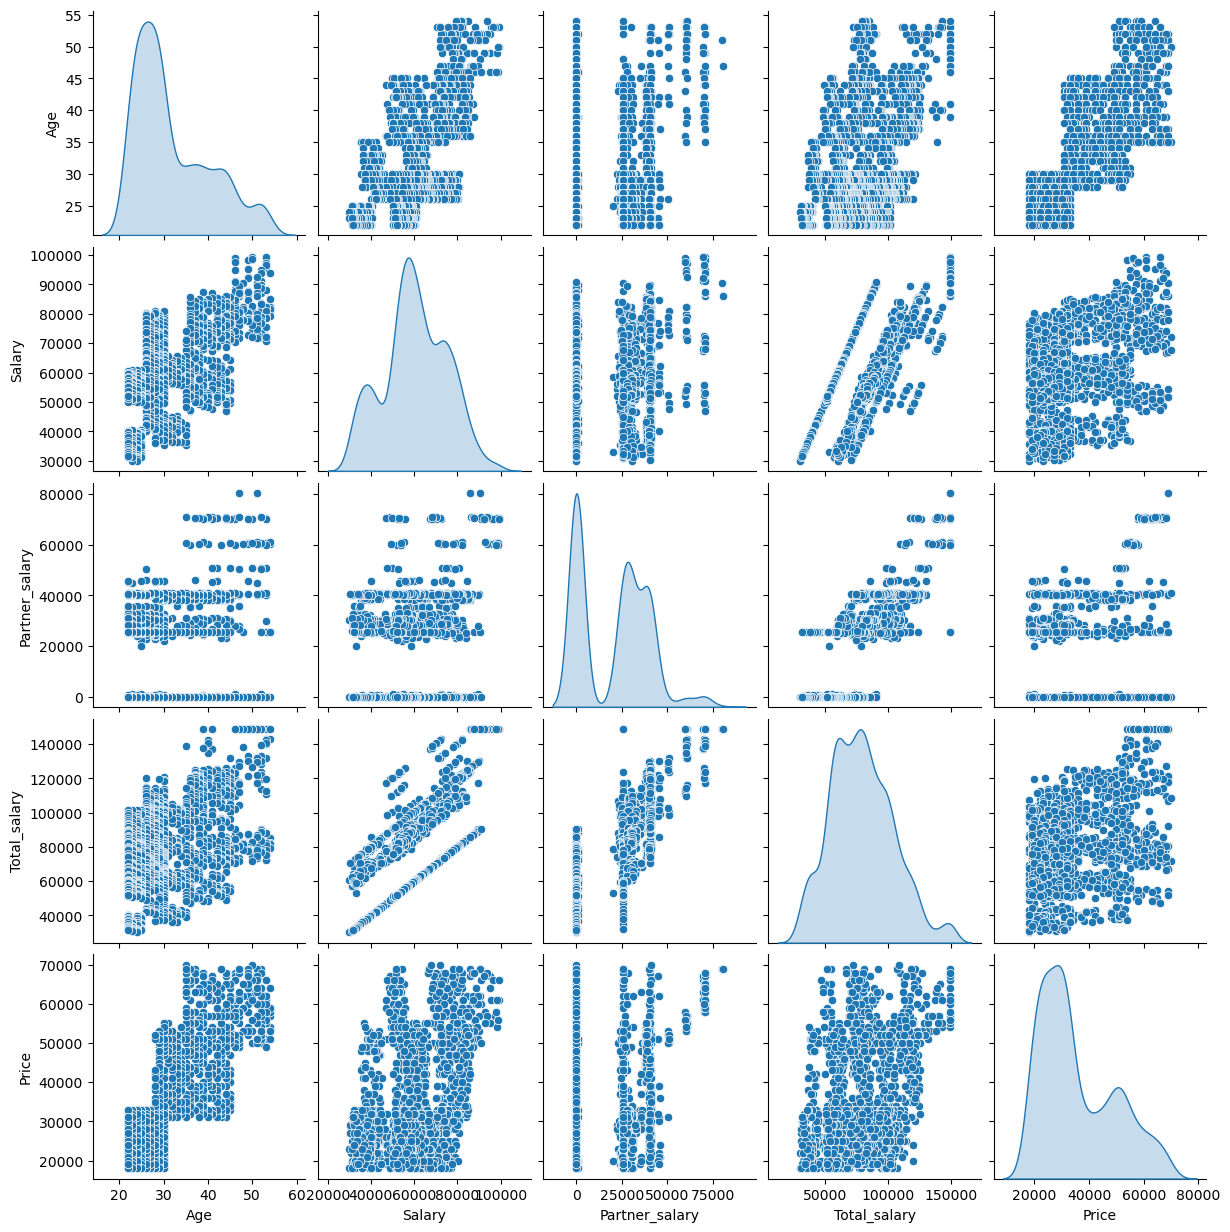

In [350]:

num_var = ['Age','Salary', 'Partner_salary', 'Total_salary', 'Price']
sns.pairplot(data=data[num_var], diag_kind="kde")
plt.xticks(rotation=90)
plt.savefig('Downloads/24.png')

#### **Categorical vs numerical variables**

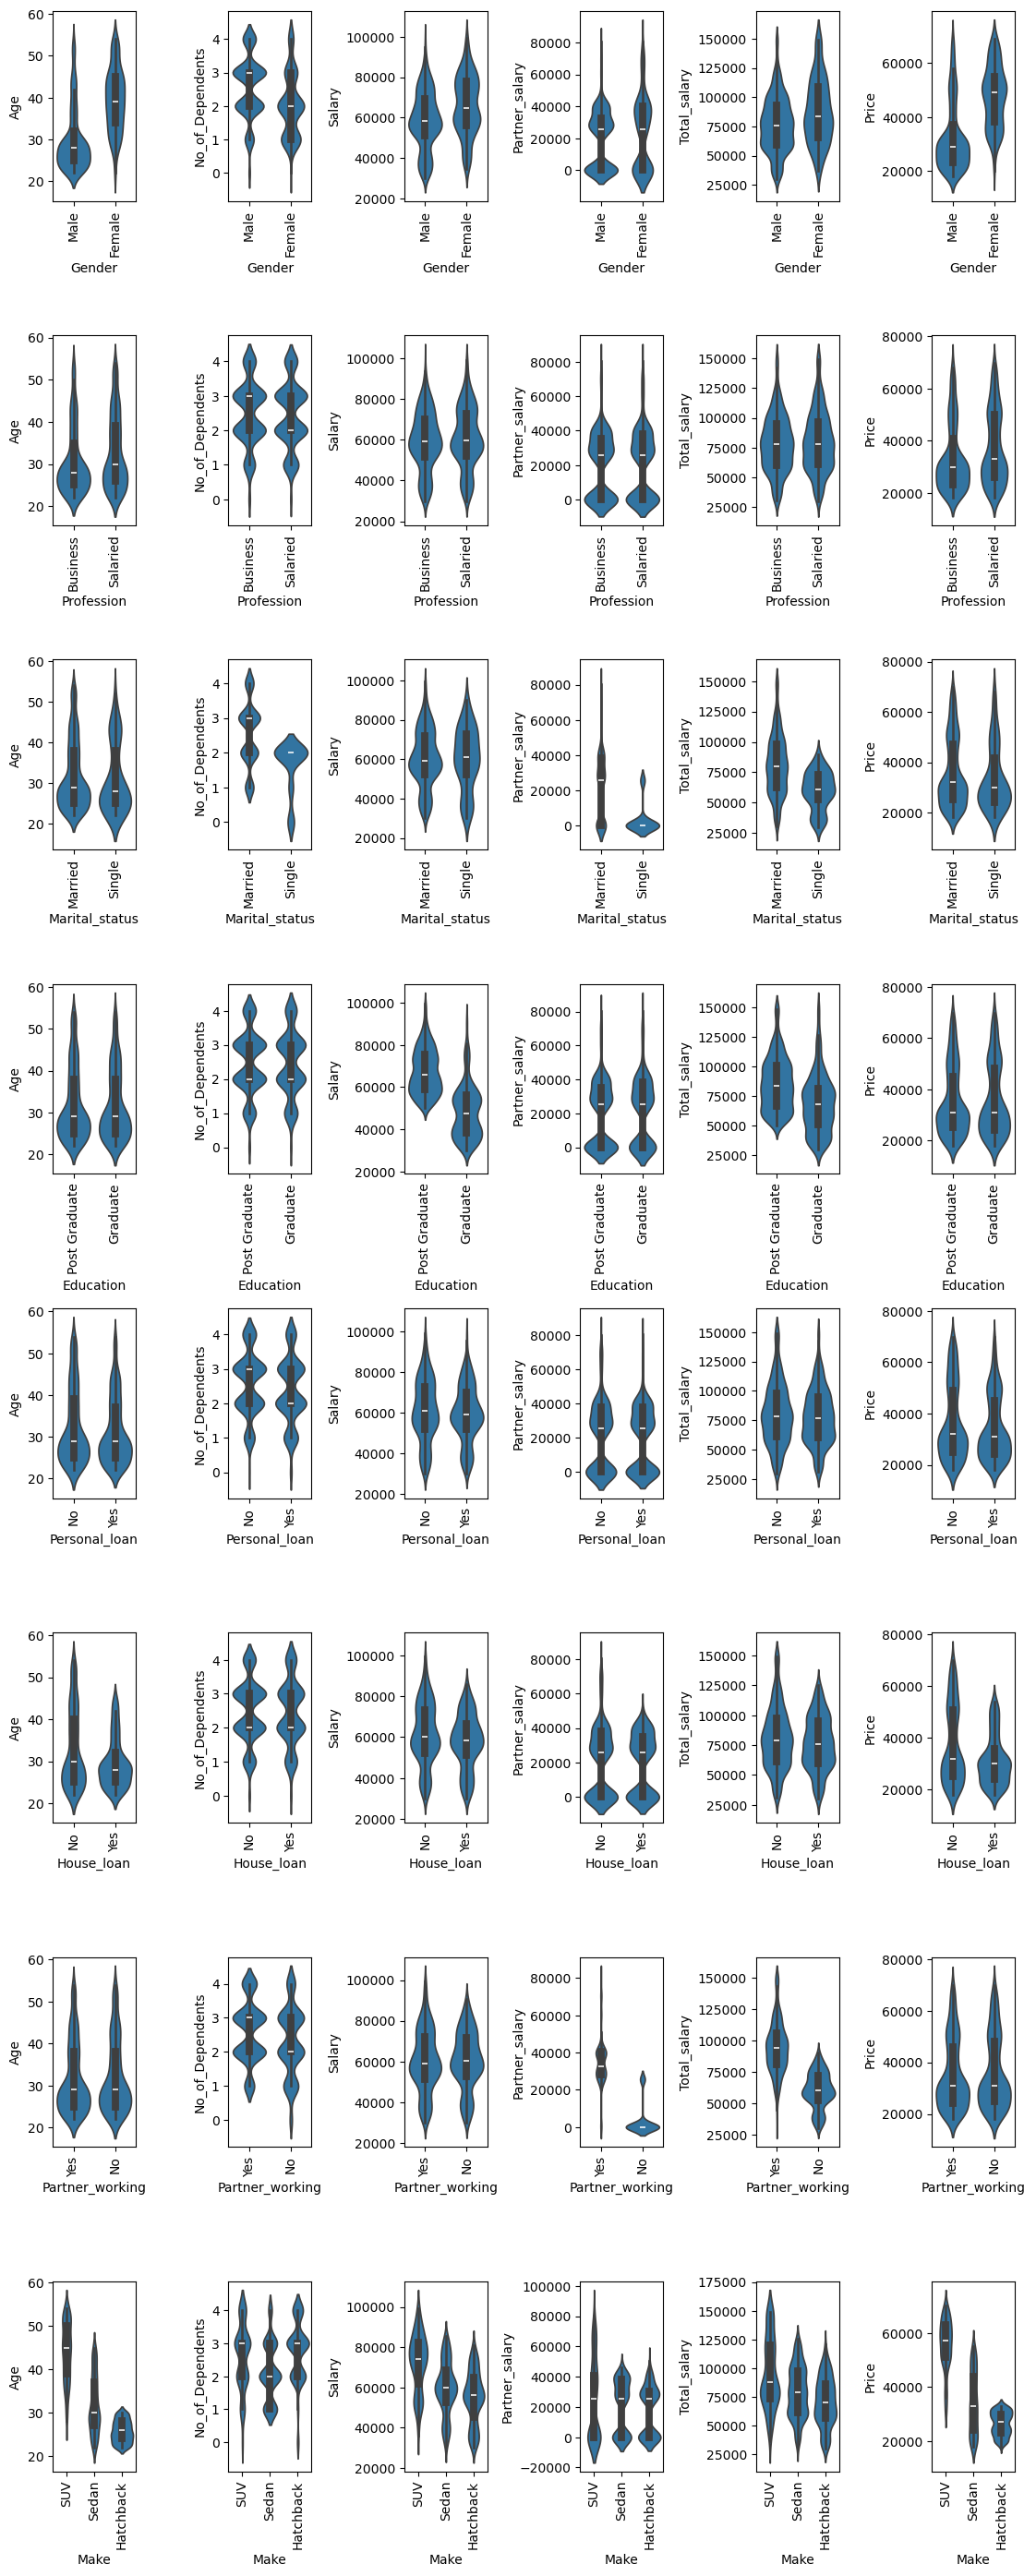

In [352]:
cat_vars = ['Gender','Profession','Marital_status','Education','Personal_loan', 'House_loan', 'Partner_working','Make']

num_vars = ['Age', 'No_of_Dependents','Salary', 'Partner_salary', 'Total_salary', 'Price']
plt.figure(figsize=(15, 28))

if len(cat_vars) > len(num_vars):
    k=len(cat_vars)
else:
    k=len(num_vars)
#Initializing a matrix to be used in making a subplot
matrix = np.arange(1,(k**2+1)).reshape(k,k)

for i, variable1 in enumerate(cat_vars):
    for j,variable2 in enumerate(num_vars):
        plt.subplot(k, k, matrix[i][j])
        sns.violinplot(x=data[variable1],y=data[variable2])
        
        # plt.suptitle('Categorical vs numerical variables')
        plt.xticks(rotation=90)
        # plt.title(variable)
plt.tight_layout()
# Set the super title for all subplots

# plt.figure(figsize=(15,7))           
# sns.boxplot(y=data['Salary'], x=data['Make'])
# plt.xlabel('Make')
# plt.ylabel('Salary')

plt.savefig('Downloads/25.png')

<Axes: ylabel='No_of_Dependents'>

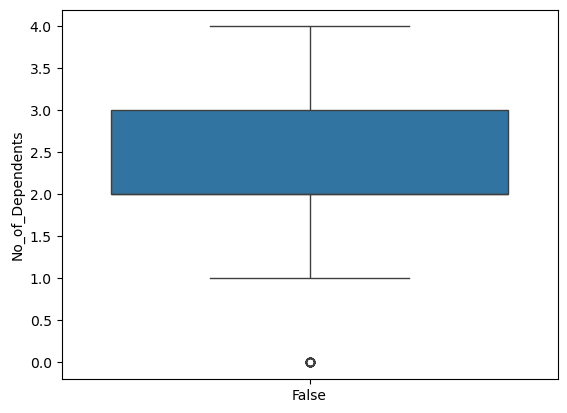

In [353]:
sns.boxplot(data,x='Marital_status'=='Single',y='No_of_Dependents')

In [354]:
data.groupby(['Partner_working'])['Partner_salary'].mean()

Partner_working
No      3231.416550
Yes    34841.359447
Name: Partner_salary, dtype: float64

data.loc[data['Partner_working']=='No']['Partner_salary'].value_counts()

In [356]:
data[(data['Marital_status']=='Single')]['Partner_salary'].value_counts(normalize=True)

Partner_salary
0.0        0.884058
25600.0    0.115942
Name: proportion, dtype: float64

In [357]:
data[(data['Partner_working']=='No')]['Partner_salary'].value_counts(normalize=True)

Partner_salary
0.0        0.873773
25600.0    0.126227
Name: proportion, dtype: float64

In [358]:
data.loc[(data['Partner_working']=='No') & (data['Partner_salary']==25600.0)]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,25600.0,72100,60000,SUV
115,48,Female,Salaried,Married,Post Graduate,3,No,No,No,78000,25600.0,78000,59000,SUV
163,45,Male,Salaried,Married,Post Graduate,1,Yes,Yes,No,71300,25600.0,71300,42000,Sedan
164,45,Male,Business,Married,Graduate,1,Yes,No,No,56700,25600.0,56700,54000,Sedan
165,45,Male,Salaried,Married,Graduate,2,No,No,No,55100,25600.0,55100,65000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,25600.0,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,25600.0,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,25600.0,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,25600.0,32000,31000,Hatchback


 **Correcting these 90 clearly wrong rows**

In [360]:
data['Partner_salary']=data['Partner_salary'].replace(25600,0)

In [361]:
data[(data['Partner_working']=='No')]['Partner_salary'].value_counts()

Partner_salary
0.0    713
Name: count, dtype: int64

In [362]:

data.loc[(data['Partner_working']=='Yes') & (data['Partner_salary']==0.0)].shape

(18, 14)

#### **Answering some of key questions**

##### 1. Do men tend to prefer SUVs more compared to women?

In [365]:
data[data['Make']=='SUV'].groupby('Gender').size()

Gender
Female    173
Male      124
dtype: int64

In [366]:
data.groupby(['Make','Gender']).size()

Make       Gender
Hatchback  Female     15
           Male      567
SUV        Female    173
           Male      124
Sedan      Female    141
           Male      561
dtype: int64

##### 2. What is the likelihood of a salaried person buying a Sedan?

In [368]:
salaried_people= data[data['Profession']=='Salaried']
salaried_sedan_buyers = salaried_people[salaried_people['Make']=='Sedan'].shape[0]
total_salaried_people = salaried_people.shape[0]
print(f"Likelihood of a salaried person buying a Sedan: {salaried_sedan_buyers / total_salaried_people:.3%}")



Likelihood of a salaried person buying a Sedan: 44.196%


##### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

<Axes: xlabel='Make', ylabel='count'>

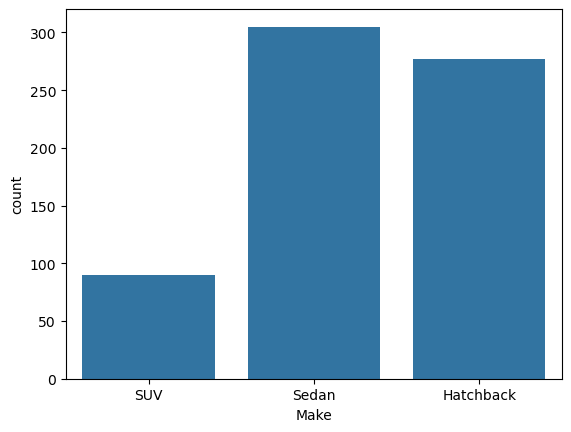

In [370]:
salaried_people= data[data['Profession']=='Salaried']
salaried_male = salaried_people[salaried_people['Gender']=='Male']
sns.countplot(salaried_male,x='Make')

##### 4. How does the the amount spent on purchasing automobiles vary by gender?

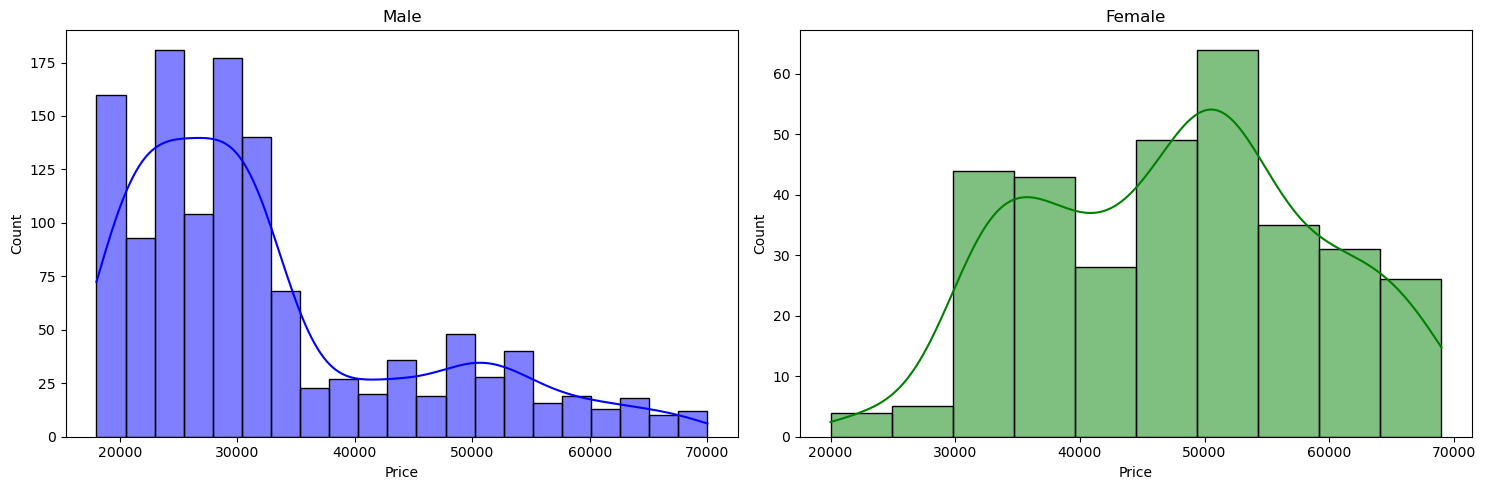

In [372]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot histograms for each DataFrame column using seaborn's histplot
sns.histplot(data[data['Gender']=='Male'],x='Price', ax=axes[0], color='blue',kde=True)
sns.histplot(data[data['Gender']=='Female'],x='Price', ax=axes[1], color='green',kde=True)

# Set titles for each subplot
axes[0].set_title('Male')
axes[1].set_title('Female')

# Adjust layout
plt.tight_layout()
plt.savefig('Downloads/35.png')

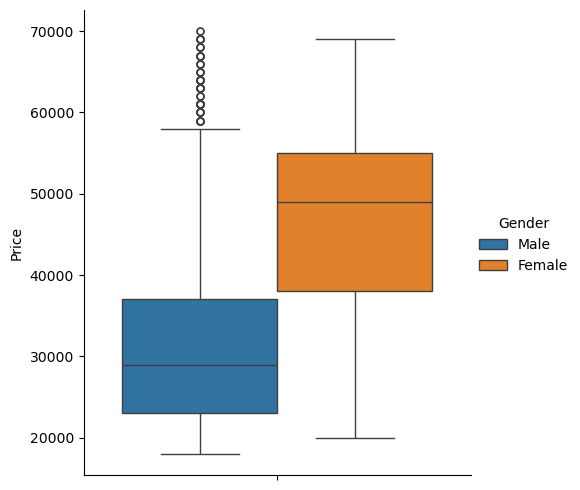

In [373]:
sns.catplot(data=data,kind='box',y='Price',hue='Gender')
plt.savefig('Downloads/36.png')

In [374]:
data.groupby(['Gender'])['Price'].mean()

Gender
Female    47705.167173
Male      32416.134185
Name: Price, dtype: float64

##### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

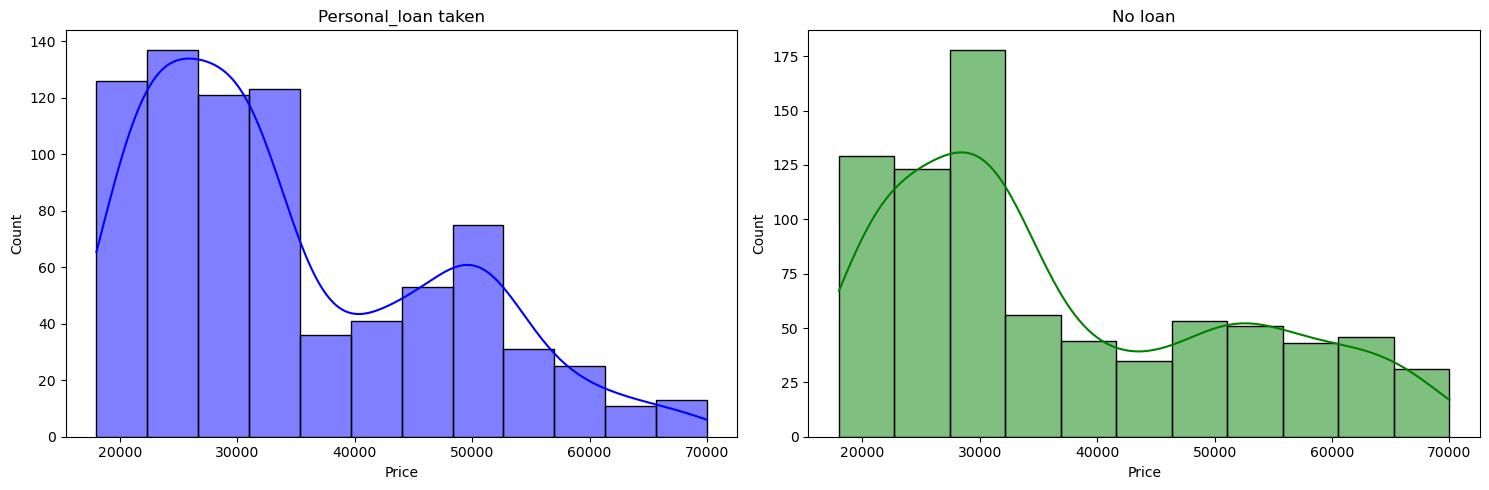

In [376]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data[data['Personal_loan']=='Yes'],x='Price', ax=axes[0], color='blue',kde=True)
sns.histplot(data[data['Personal_loan']=='No'],x='Price', ax=axes[1], color='green',kde=True)
# Set titles for each subplot
axes[0].set_title('Personal_loan taken')
axes[1].set_title('No loan')

# Adjust layout
plt.tight_layout()

plt.savefig('Downloads/37.png')

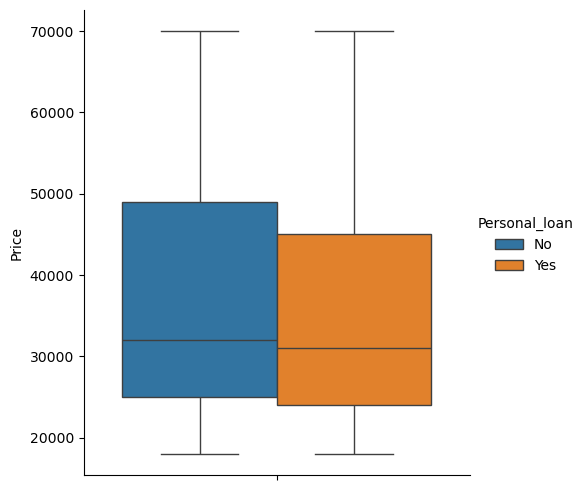

In [377]:
sns.catplot(data=data,kind='box',hue='Personal_loan',y='Price')
plt.savefig('Downloads/38.png')

In [378]:
data.groupby(['Personal_loan'])['Price'].mean()

Personal_loan
No     36742.712294
Yes    34457.070707
Name: Price, dtype: float64

##### 6. How does having a working partner influence the purchase of higher-priced cars?

In [380]:
data[data['Partner_working']=='Yes']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,149000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,149000,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,149000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,22,Female,Salaried,Married,Graduate,3,No,No,Yes,34800,28100.0,62900,31000,Hatchback
1537,22,Male,Business,Married,Graduate,3,Yes,Yes,Yes,31300,30900.0,62200,23000,Sedan
1539,22,Male,Salaried,Married,Graduate,2,No,No,Yes,32100,28100.0,60200,27000,Sedan
1546,22,Male,Business,Married,Graduate,3,Yes,No,Yes,32600,0.0,59300,20000,Hatchback


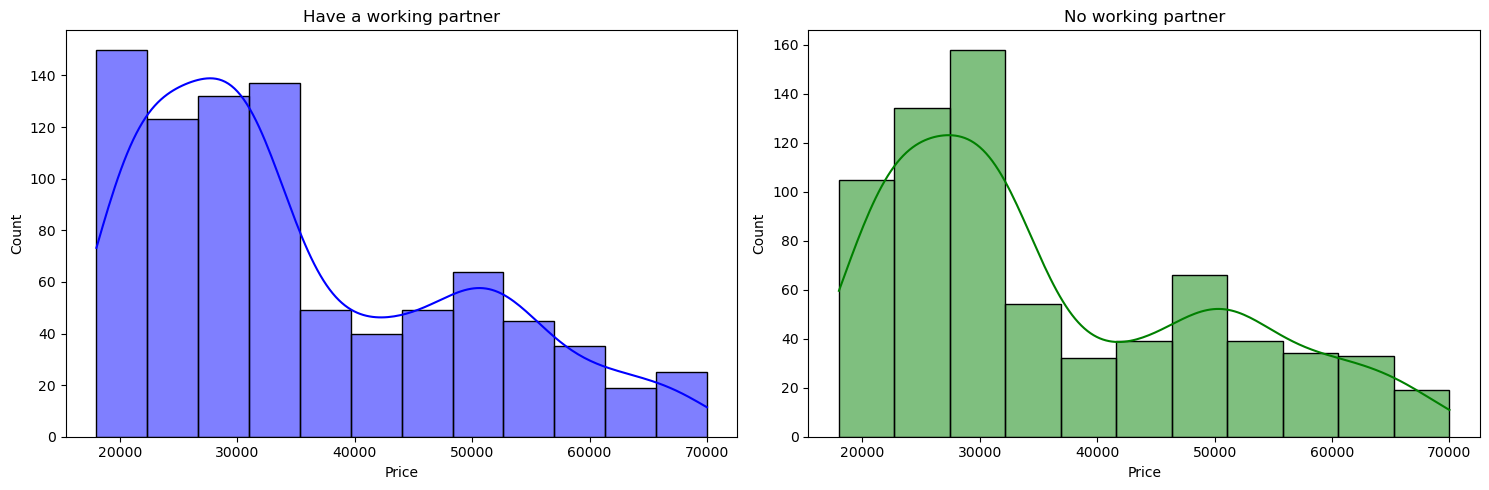

In [381]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data[data['Partner_working']=='Yes'],x='Price', ax=axes[0], color='blue',kde=True)
sns.histplot(data[data['Partner_working']=='No'],x='Price', ax=axes[1], color='green',kde=True)
# Set titles for each subplot
axes[0].set_title('Have a working partner')
axes[1].set_title('No working partner')

# Adjust layout
plt.tight_layout()

plt.savefig('Downloads/39.png')

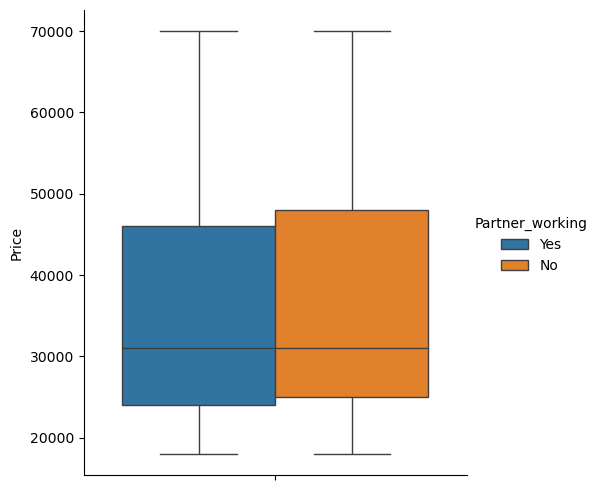

In [382]:
sns.catplot(data=data,kind='box',hue='Partner_working',y='Price')

plt.savefig('Downloads/40.png')

In [383]:
data.groupby(['Partner_working'])['Price'].mean()

Partner_working
No     36000.000000
Yes    35267.281106
Name: Price, dtype: float64

In [384]:
Q1_yes = data[data['Partner_working']=='Yes']['Price'].quantile(0.5)  # 50th quantile
print(Q1_yes)
Q1_no = data[data['Partner_working']=='Yes']['Price'].quantile(0.5)  # 50th quantile
print(Q1_no)

31000.0
31000.0


In [385]:
data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,149000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,149000,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,149000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


#### Some extra intersting questions to look into

##### 6. How does the level of Education impact price of cars purchased.

In [388]:
data['Education'].value_counts()

Education
Post Graduate    985
Graduate         596
Name: count, dtype: int64

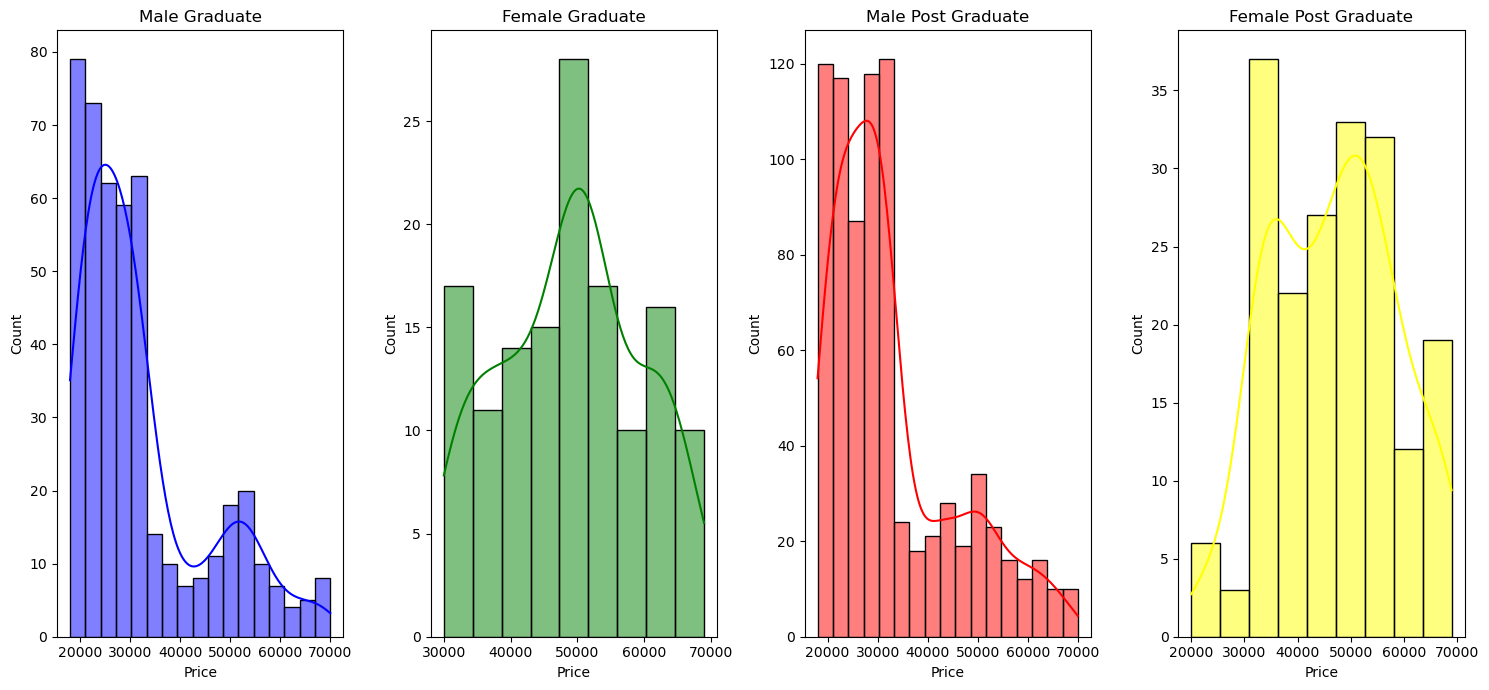

In [389]:
fig,axes = plt.subplots(1,4,figsize=(15,7))
graduate = data[data['Education']=='Graduate']
post_graduate = data[data['Education']=='Post Graduate']
grad_male = graduate[graduate['Gender']=='Male']
grad_female = graduate[graduate['Gender']=='Female']
post_grad_male = post_graduate[post_graduate['Gender']=='Male']
post_grad_female = post_graduate[post_graduate['Gender']=='Female']
sns.histplot(grad_male,x='Price', ax=axes[0], color='blue',kde=True)
sns.histplot(grad_female,x='Price', ax=axes[1], color='green',kde=True)
sns.histplot(post_grad_male,x='Price', ax=axes[2], color='red',kde=True)
sns.histplot(post_grad_female,x='Price', ax=axes[3], color='yellow',kde=True)
# Set titles for each subplot
axes[0].set_title('Male Graduate')
axes[1].set_title('Female Graduate')
axes[2].set_title('Male Post Graduate')
axes[3].set_title('Female Post Graduate')

# Adjust layout
plt.tight_layout()

plt.savefig('Downloads/41.png')

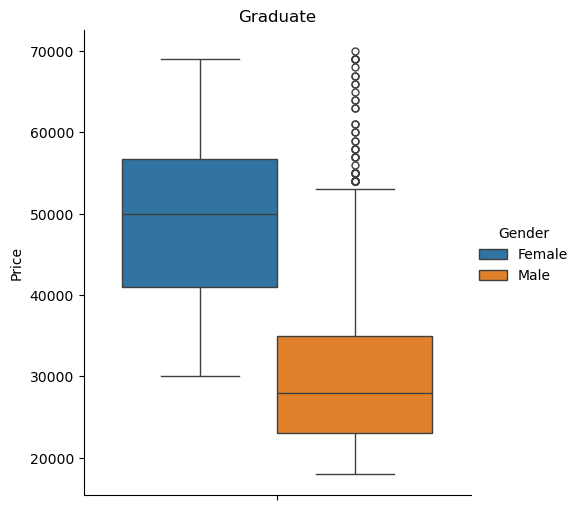

In [390]:
sns.catplot(data=graduate,kind='box',hue='Gender',y='Price')
plt.title('Graduate')
plt.savefig('Downloads/42.png')

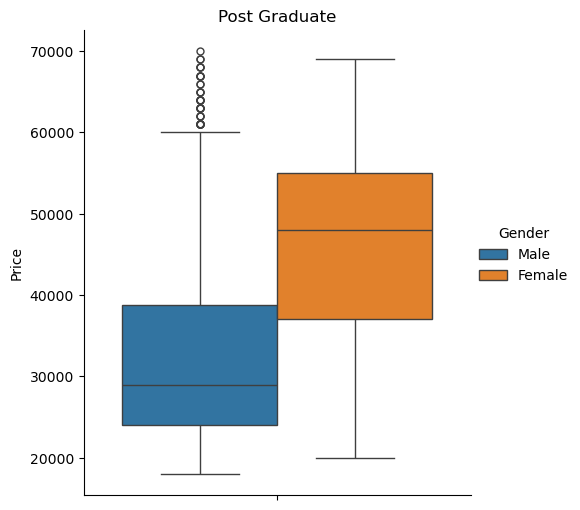

In [391]:
sns.catplot(data=post_graduate,kind='box',hue='Gender',y='Price')
plt.title('Post Graduate')
plt.savefig('Downloads/43.png')

**total salary vs price**

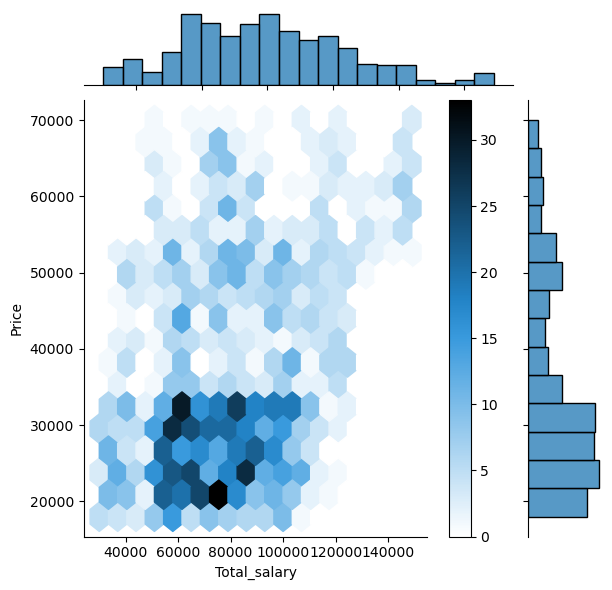

In [393]:
sns.jointplot(data=data, x='Total_salary', y='Price', kind="hex");
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

**How much money was spent on purchasing automobiles by individuals who took both personal loan and house loan?**

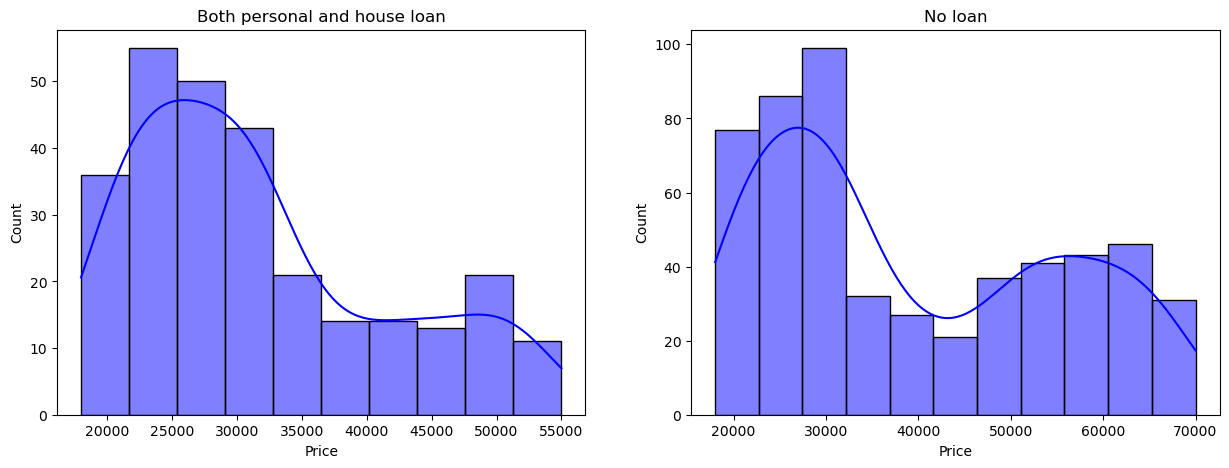

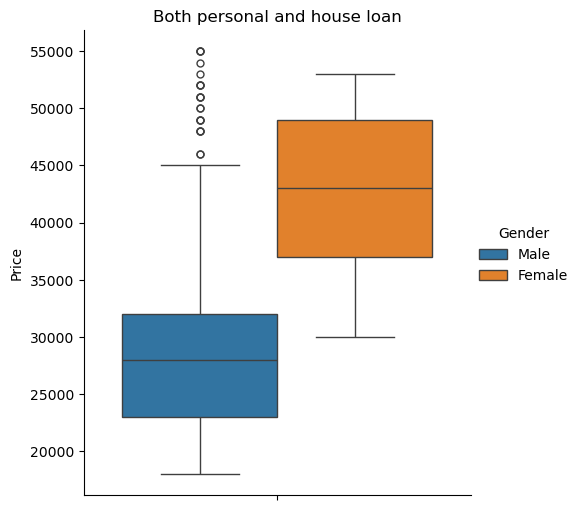

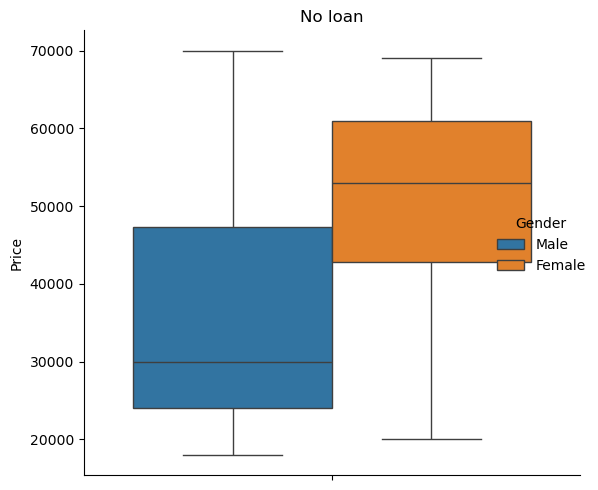

In [395]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data[(data['Personal_loan']=='Yes') & (data['House_loan']=='Yes') ],x='Price', ax=axes[0], color='blue',kde=True)
sns.histplot(data[(data['Personal_loan']=='No') & (data['House_loan']=='No') ],x='Price', ax=axes[1], color='blue',kde=True)
# Set titles for each subplot
axes[0].set_title('Both personal and house loan')
axes[1].set_title('No loan')

sns.catplot(data=data[(data['Personal_loan']=='Yes') & (data['House_loan']=='Yes') ],kind='box',hue='Gender',y='Price')
plt.title('Both personal and house loan')
sns.catplot(data=data[(data['Personal_loan']=='No') & (data['House_loan']=='No') ],kind='box',hue='Gender',y='Price')
plt.title('No loan')
# Adjust layout
plt.tight_layout()


**Age with salary or business vs price**

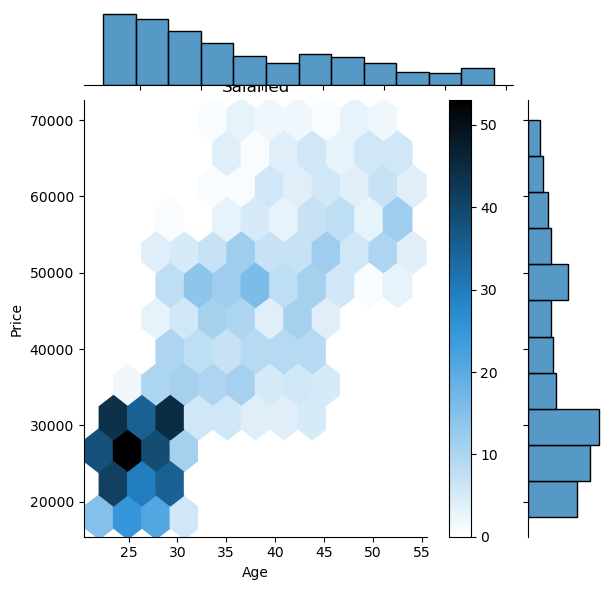

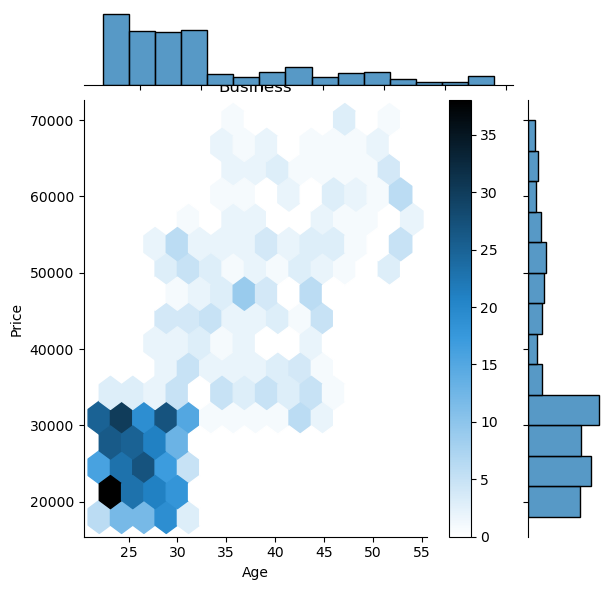

In [397]:
sns.jointplot(data=data[data['Profession']=='Salaried'], x='Age', y='Price', kind="hex");
plt.title('Salaried')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot
sns.jointplot(data=data[data['Profession']=='Business'], x='Age', y='Price', kind="hex");
plt.title('Business')
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

In [398]:
data

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,149000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,149000,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,149000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


In [399]:
data['Make'].value_counts()

Make
Sedan        702
Hatchback    582
SUV          297
Name: count, dtype: int64

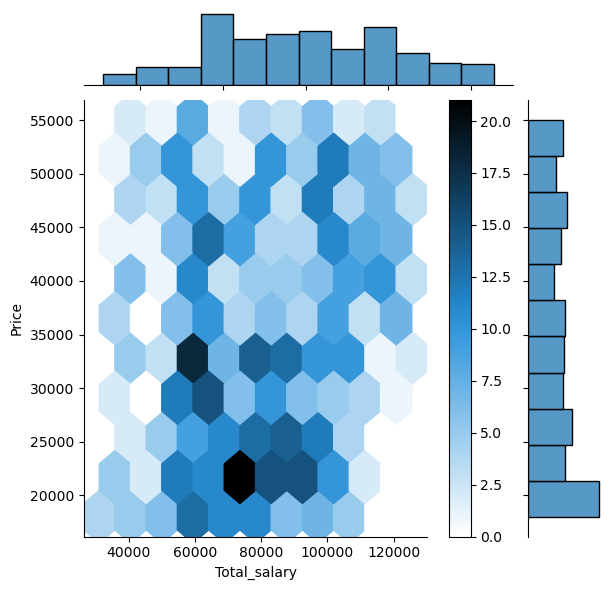

In [400]:
sns.jointplot(data=data[data['Make']=='Sedan'], x='Total_salary', y='Price', kind="hex");
# plt.savefig
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

plt.savefig('Downloads/50.png')

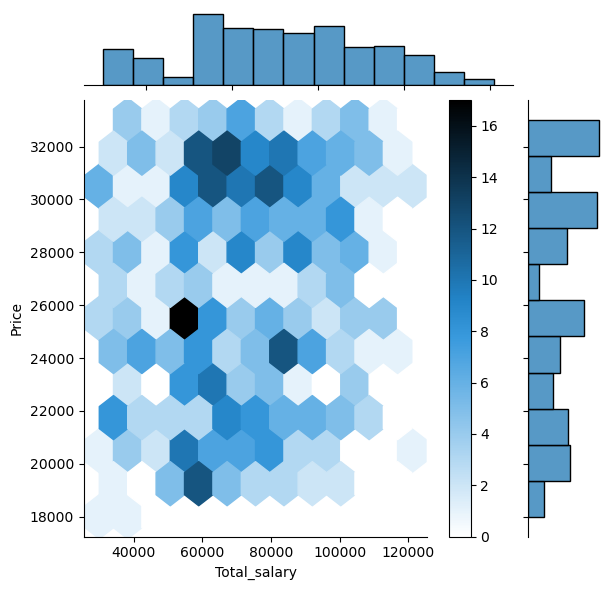

In [401]:
sns.jointplot(data=data[data['Make']=='Hatchback'], x='Total_salary', y='Price', kind="hex");
# plt.savefig
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

plt.savefig('Downloads/51.png')

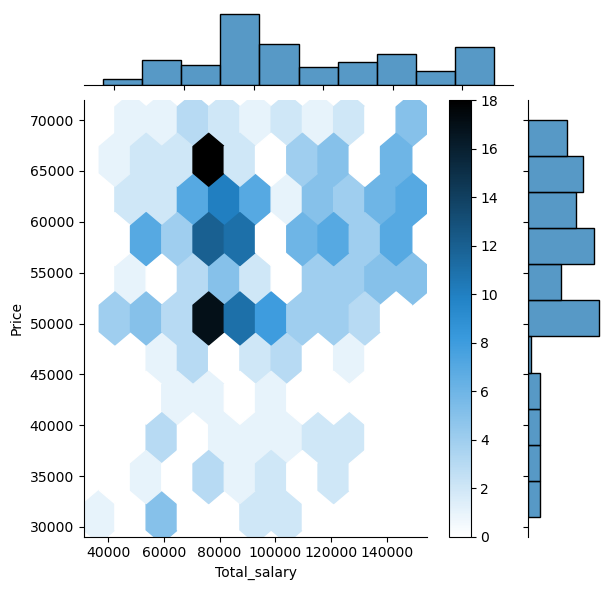

In [402]:
sns.jointplot(data=data[data['Make']=='SUV'], x='Total_salary', y='Price', kind="hex");
# plt.savefig
plt.colorbar(); # adds a separate axis indicating the color scale in this plot

plt.savefig('Downloads/52.png')